In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\Vstore Computer\Datasets\in-vehicle-coupon-recommendation.csv')

### Data Understanding

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
df.shape

(12684, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
df.duplicated().sum()

np.int64(74)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


In [9]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called destination has 3 unique values
Column called passanger has 4 unique values
Column called weather has 3 unique values
Column called temperature has 3 unique values
Column called time has 5 unique values
Column called coupon has 5 unique values
Column called expiration has 2 unique values
Column called gender has 2 unique values
Column called age has 8 unique values
Column called maritalStatus has 5 unique values
Column called has_children has 2 unique values
Column called education has 6 unique values
Column called occupation has 25 unique values
Column called income has 9 unique values
Column called car has 5 unique values
Column called Bar has 5 unique values
Column called CoffeeHouse has 5 unique values
Column called CarryAway has 5 unique values
Column called RestaurantLessThan20 has 5 unique values
Column called Restaurant20To50 has 5 unique values
Column called toCoupon_GEQ5min has 1 unique values
Column called toCoupon_GEQ15min has 2 unique values
Column called toC

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

expiration
1d    7091
2h    5593
Name: count, dtype: int64

gender
Female    6511
Male      6173
Name: count, dtype: int64

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

maritalStatus
Married partner      5100
Single               475

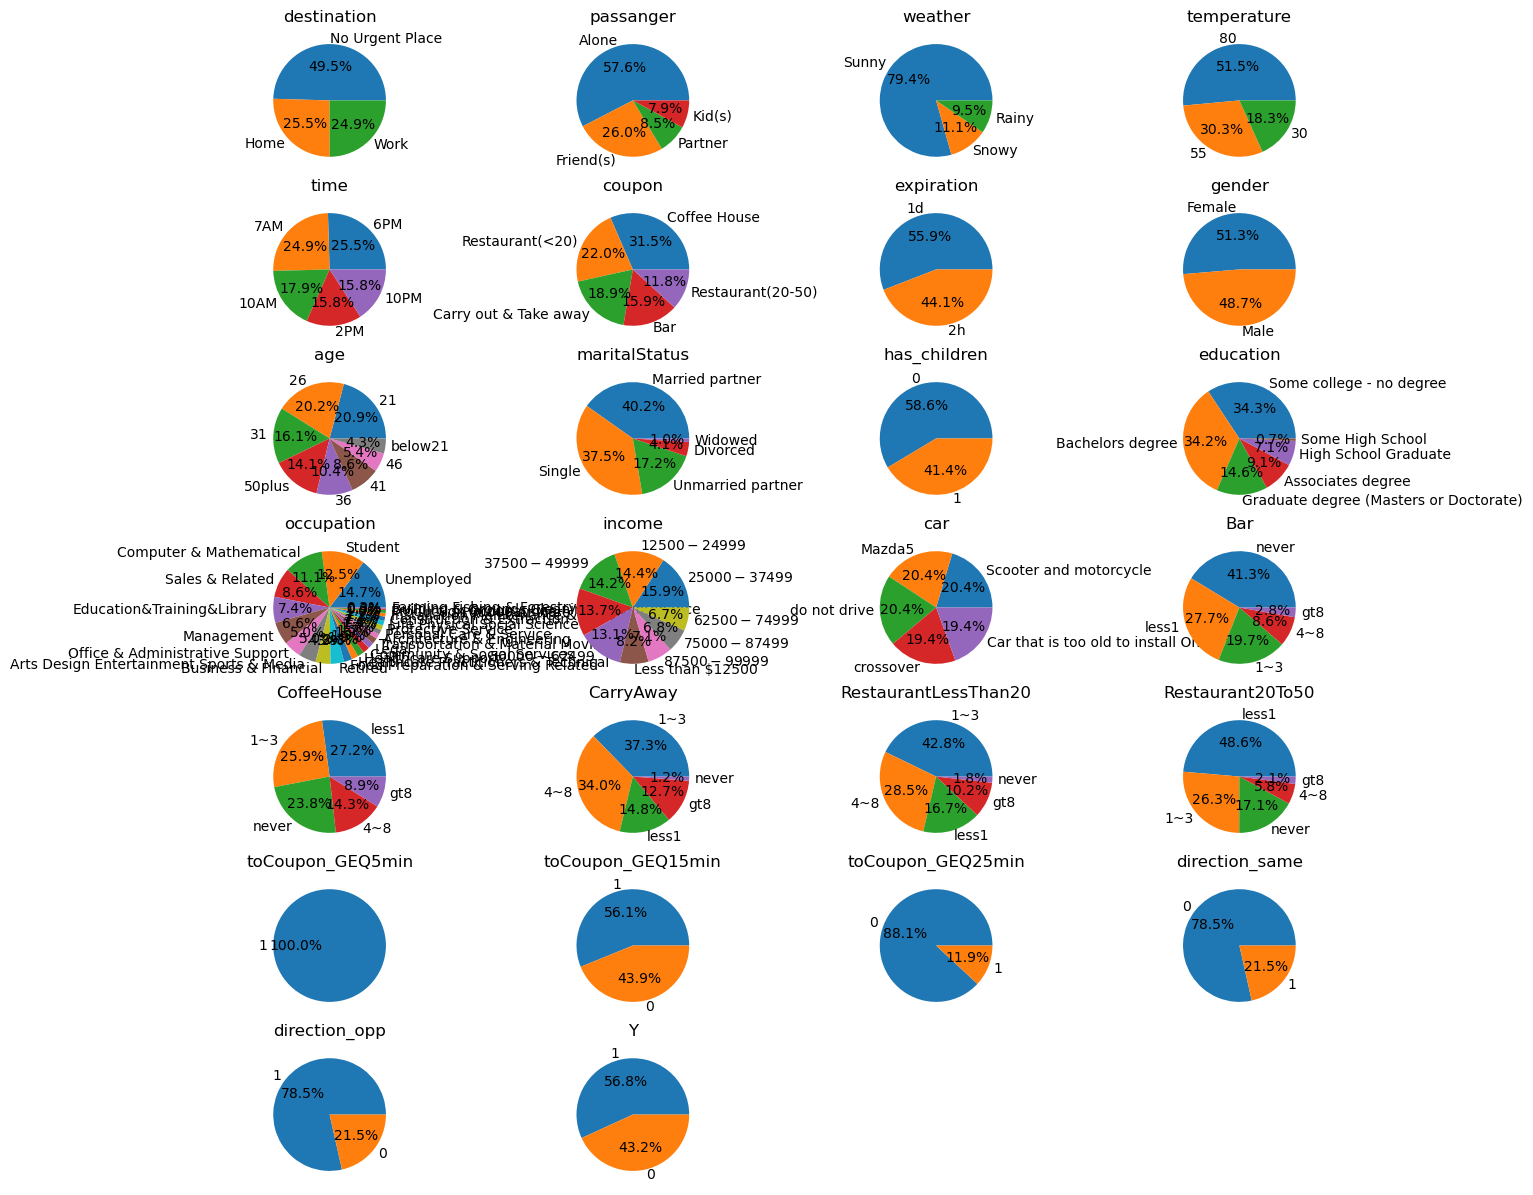

In [10]:
columns = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']
plt.figure(figsize=(15,15))
for col in columns:
  count_values = df[col].value_counts()
  print(count_values,end='\n\n')
  plt.subplot(7,4,columns.index(col)+1)
  plt.title(col)    
  plt.pie(count_values,labels=count_values.index,autopct='%1.1f%%')
  plt.axis('off')
plt.show()

### Data Preparation

#### Data Cleansing

In [11]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(74)

##### Handle Missing Value

In [13]:
print('Is there any missing value present or not?',df.isnull().values.any())
missing_percentage = df.isnull().sum()*100/len(df)
missing_value_df = pd.DataFrame({'missing_count': df.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


In [14]:
# Drop unnecessary columns
df = df.drop(['car', 'toCoupon_GEQ5min', 'direction_opp'], axis=1)

In [15]:
# handle missing values in data by using mode imputation
df['Bar']=df['Bar'].fillna(df['Bar'].value_counts().index[0])
df['CoffeeHouse']=df['CoffeeHouse'].fillna(df['CoffeeHouse'].value_counts().index[0])
df['CarryAway']=df['CarryAway'].fillna(df['CarryAway'].value_counts().index[0])
df['RestaurantLessThan20']=df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].value_counts().index[0])
df['Restaurant20To50']=df['Restaurant20To50'].fillna(df['Restaurant20To50'].value_counts().index[0])

In [16]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

##### Handle Duplicated Data

In [17]:
duplicate = df[df.duplicated(keep = 'last')]
df = df.drop_duplicates()
print("Shape of dataset after removing duplicates:",df.shape)

Shape of dataset after removing duplicates: (12610, 23)


In [18]:
df.duplicated().sum()

np.int64(0)

##### Handle Outliers

In [19]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610,12610,12610,12610.000000,12610,12610,12610,12610,12610,12610,12610.000000,12610,12610,12610,12610,12610,12610,12610,12610,12610.000000,12610.000000,12610.000000,12610.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN
freq,6266,7248,10011,NaN,3220,3989,7031,6469,2642,5068,NaN,4325,1861,2006,5285,3579,4795,5485,6230,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.267248,NaN,NaN,NaN,NaN,NaN,NaN,0.414512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559794,0.116019,0.215543,0.567565
std,NaN,NaN,NaN,19.153386,NaN,NaN,NaN,NaN,NaN,NaN,0.492657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496432,0.320260,0.411215,0.495434
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000


No need to handle the outliers because each data from the features are categorical.

##### Convert Datatypes

In [20]:
# Change data types
df["has_children"] = df["has_children"].astype("object")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  object
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

##### Feature Transformation

In [22]:
#checking age unique value
df['age'].value_counts()

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [23]:
#categorize it, so it could  be simpler
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '< 21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '> 50'
    age_list.append(age)
df['age'] = age_list

In [24]:
df['age'].value_counts()

age
21-30    5190
31-40    3336
> 50     1781
41-50    1759
< 21      544
Name: count, dtype: int64

In [25]:
#checking age unique value
df['occupation'].value_counts()

occupation
Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management                                    821
Office & Administrative Support               638
Arts Design Entertainment Sports & Media      627
Business & Financial                          543
Retired                                       493
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   239
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            174
Life Physical Social Science           

In [26]:
df['occupation'] = df['occupation'].replace({'Education&Training&Library': 'Education, Training, & Library', 'Life Physical Social Science': 'Life, Physical, & Social Science', 'Farming Fishing & Forestry': 'Farming, Fishing, & Forestry', 'Installation Maintenance & Repair': 'Installation, Maintenance, & Repair', 'Arts Design Entertainment Sports & Media': 'Arts, Design, Entertainment, Sports, & Media'})

In [27]:
occupation_list = []
for i in df['occupation']:
    if i == 'Unemployed' or i == 'Retired' or i == 'Student':
        occupation = 'Employment Status'
    elif i == 'Management' or i == 'Business & Financial' or i == 'Office & Administrative Support' or i == 'Legal':
        occupation = 'Management, Business & Office'
    elif i == i == 'Architecture & Engineering' or i == 'Computer & Mathematical' or i == 'Life, Physical, & Social Science':
        occupation = 'Science, Technology, Engineering, & Math (STEM)'
    elif i == 'Education, Training, & Library' or i == 'Community & Social Services':
        occupation = 'Education & Social Services'
    elif i == 'Healthcare Practitioners & Technical' or i == 'Healthcare Support':
        occupation = 'Healthcare'
    elif i == 'Arts, Design, Entertainment, Sports, & Media' or i == 'Sales & Related':
        occupation = 'Arts, Media & Communication'
    elif i == 'Personal Care & Service' or i == 'Protective Service' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Service Occupations'
    else:
        occupation = 'Skilled Trades, Construction & Extraction'
    occupation_list.append(occupation)
df['occupation'] = occupation_list

In [28]:
df['occupation'].value_counts()

occupation
Employment Status                                  3929
Management, Business & Office                      2221
Science, Technology, Engineering, & Math (STEM)    1734
Arts, Media & Communication                        1715
Education & Social Services                        1178
Service Occupations                                 691
Skilled Trades, Construction & Extraction           656
Healthcare                                          486
Name: count, dtype: int64

In [29]:
# Income bucket
income_bucket = []
for i in df['income']:
    if i in ["Less than $12500", "$12500 - $24999"]:
        income_bucket.append("Low")
    elif i in ["$25000 - $37499", "$37500 - $49999", "$50000 - $62499"]:
        income_bucket.append("Medium")
    else:
        income_bucket.append("High")

df['income'] = income_bucket

In [30]:
df['income'].value_counts()

income
Medium    5456
High      4295
Low       2859
Name: count, dtype: int64

#### E.D.A

In [31]:
# Income vs Coupon Acceptance
pivoted_df = df.pivot_table(index = 'income',columns = 'Y',aggfunc='size',fill_value=0)

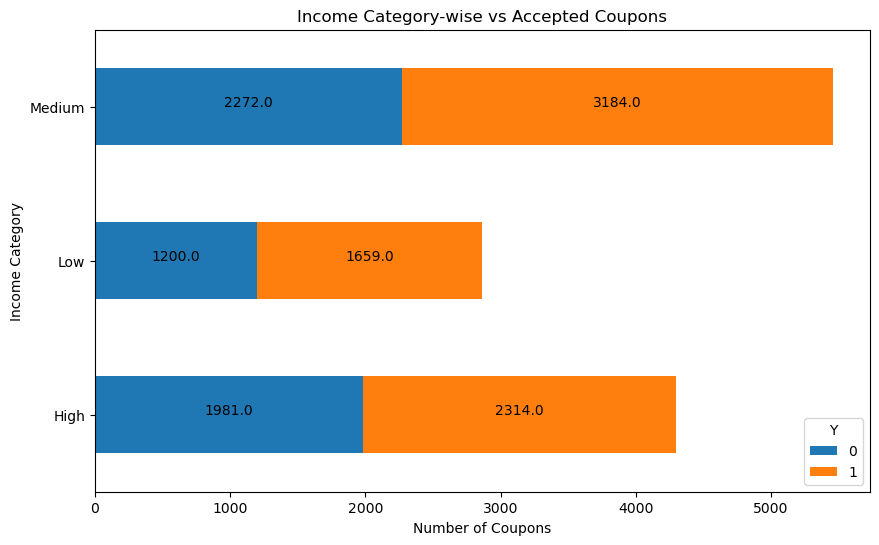

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
pivoted_df.plot(kind='barh',stacked=True,ax=ax)
ax.set_xlabel("Number of Coupons")
ax.set_ylabel("Income Category")
ax.set_title("Income Category-wise vs Accepted Coupons")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(f'{width}', (x+width/2, y+height/2), ha = 'center')

    
plt.show()

<Figure size 2000x800 with 0 Axes>

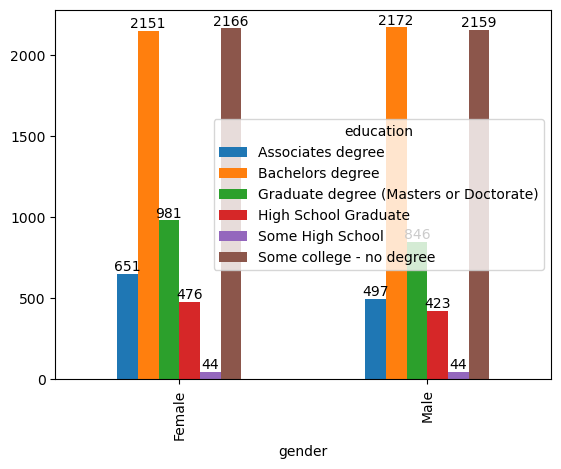

In [33]:
# Gender vs Education counts
plt.figure(figsize=(20,8))
ax = pd.crosstab(df.gender,df.education).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

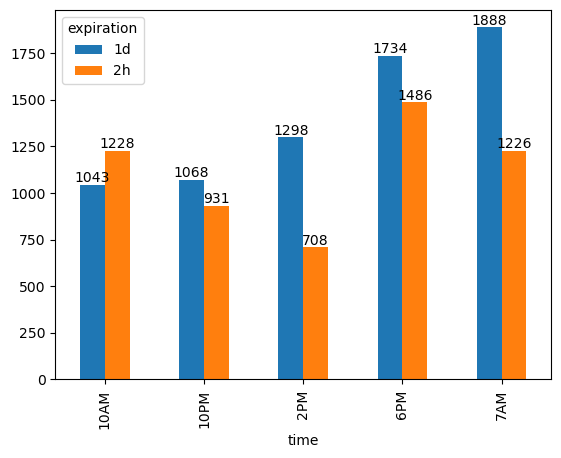

In [34]:
ax=pd.crosstab(df.time,df.expiration).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

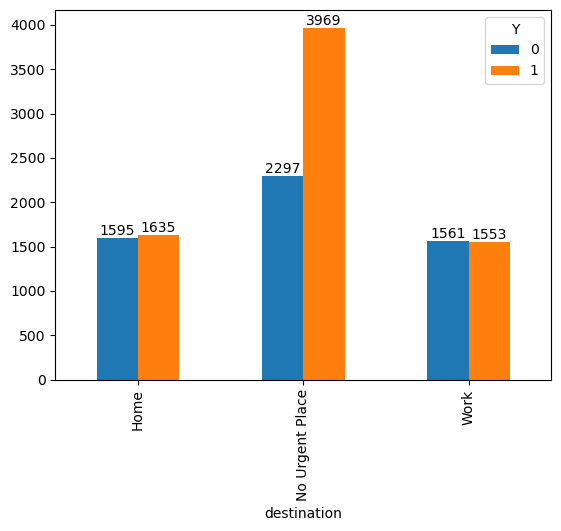

In [35]:
ax = pd.crosstab(df.destination, df.Y).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [36]:
df_y_0 = df[df['Y'] == 0]
df_y_1 = df[df['Y'] == 1]

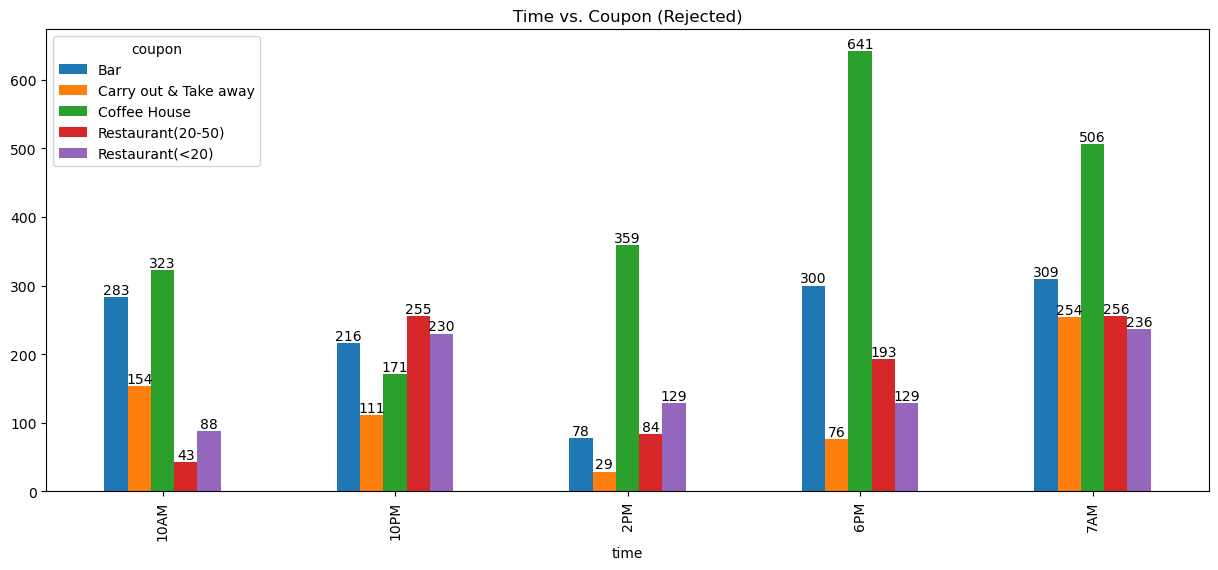

In [37]:
ax = pd.crosstab(df_y_0.time,df_y_0.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Time vs. Coupon (Rejected)')
plt.show()

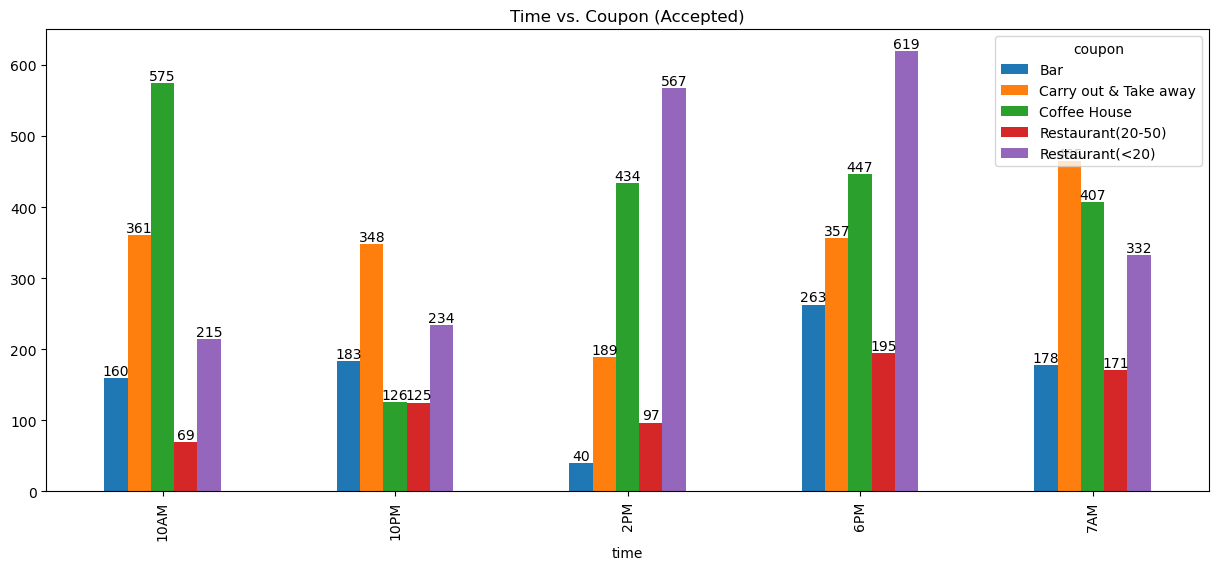

In [38]:
ax = pd.crosstab(df_y_1.time,df_y_1.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Time vs. Coupon (Accepted)')
plt.show()

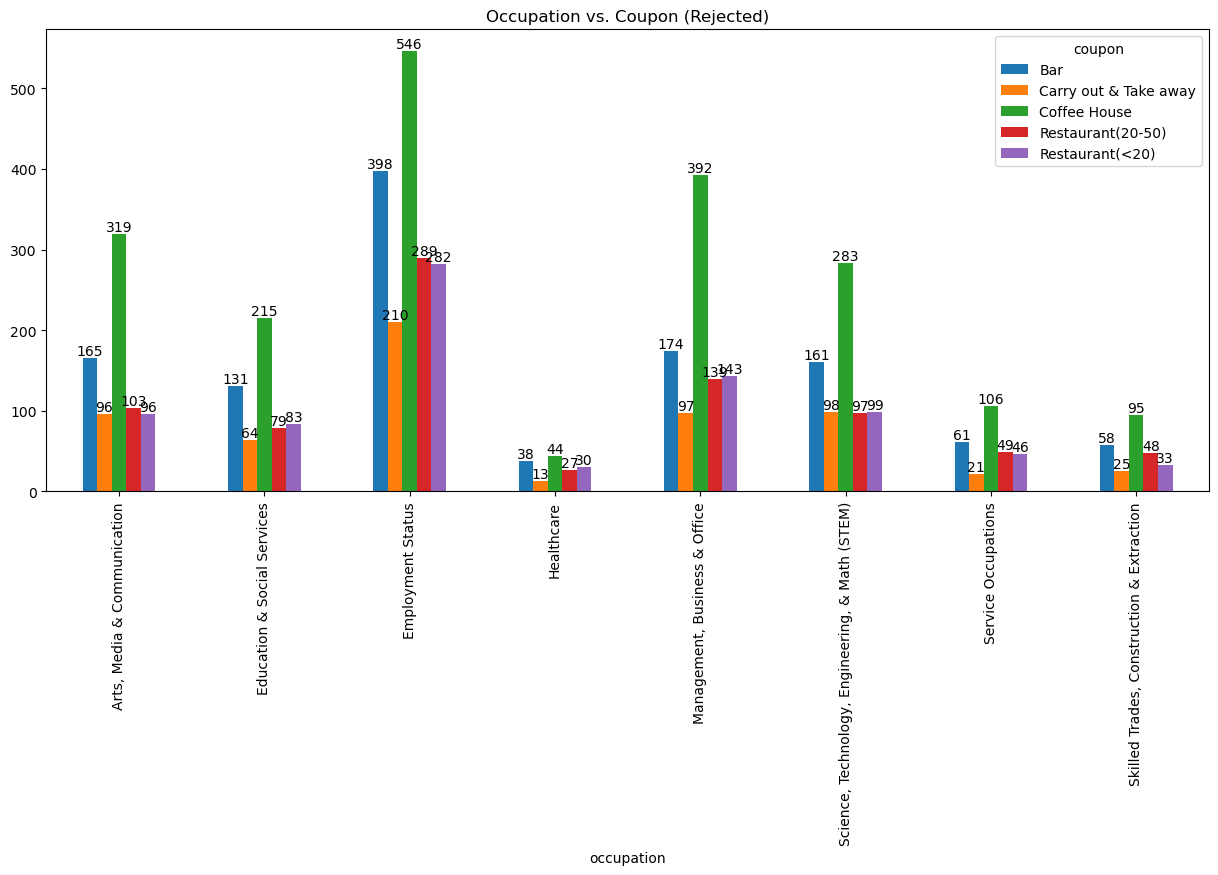

In [39]:
ax = pd.crosstab(df_y_0.occupation,df_y_0.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Occupation vs. Coupon (Rejected)')
plt.show()

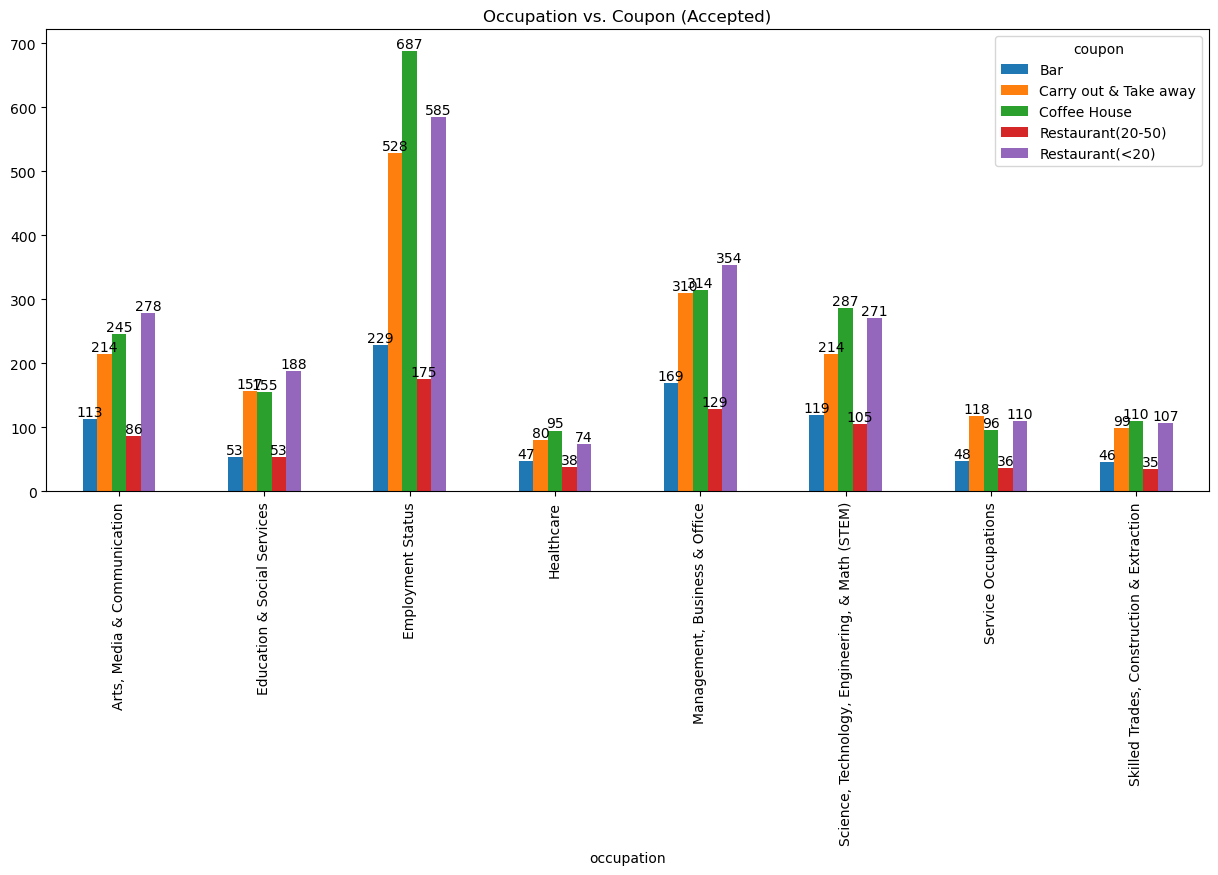

In [40]:
ax = pd.crosstab(df_y_1.occupation,df_y_1.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Occupation vs. Coupon (Accepted)')
plt.show()

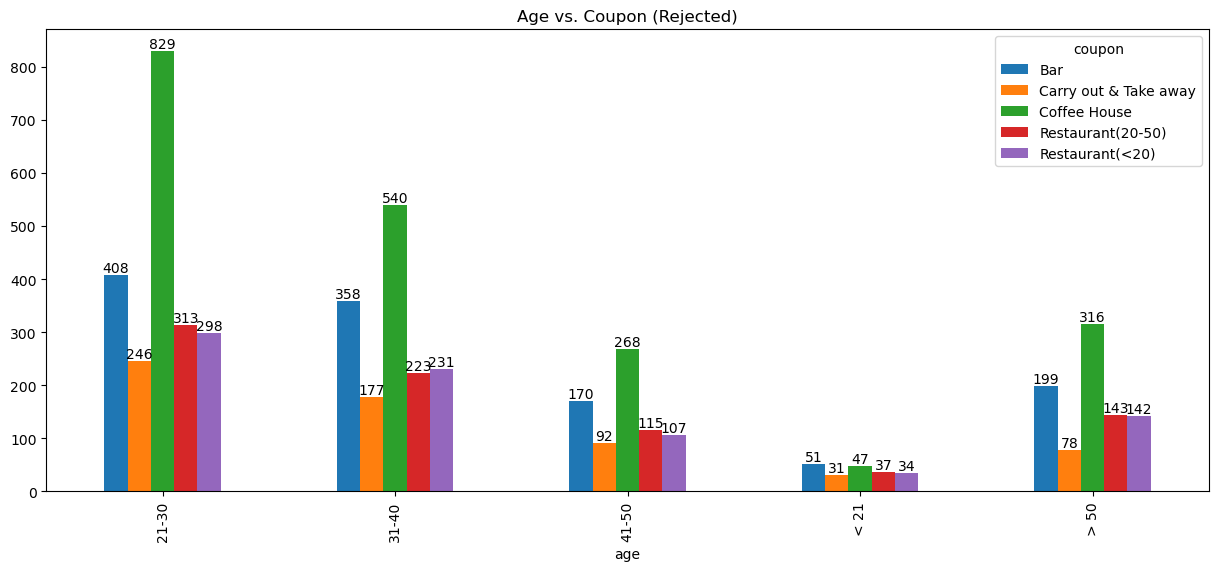

In [41]:
ax = pd.crosstab(df_y_0.age,df_y_0.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Age vs. Coupon (Rejected)')
plt.show()

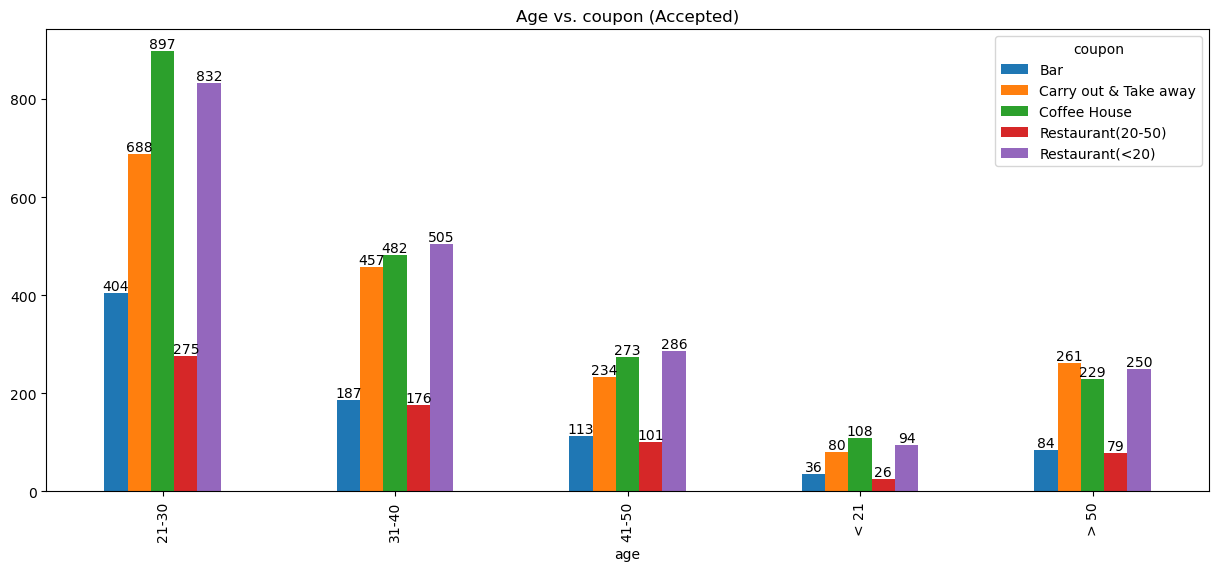

In [42]:
ax = pd.crosstab(df_y_1.age,df_y_1.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Age vs. coupon (Accepted)')
plt.show()

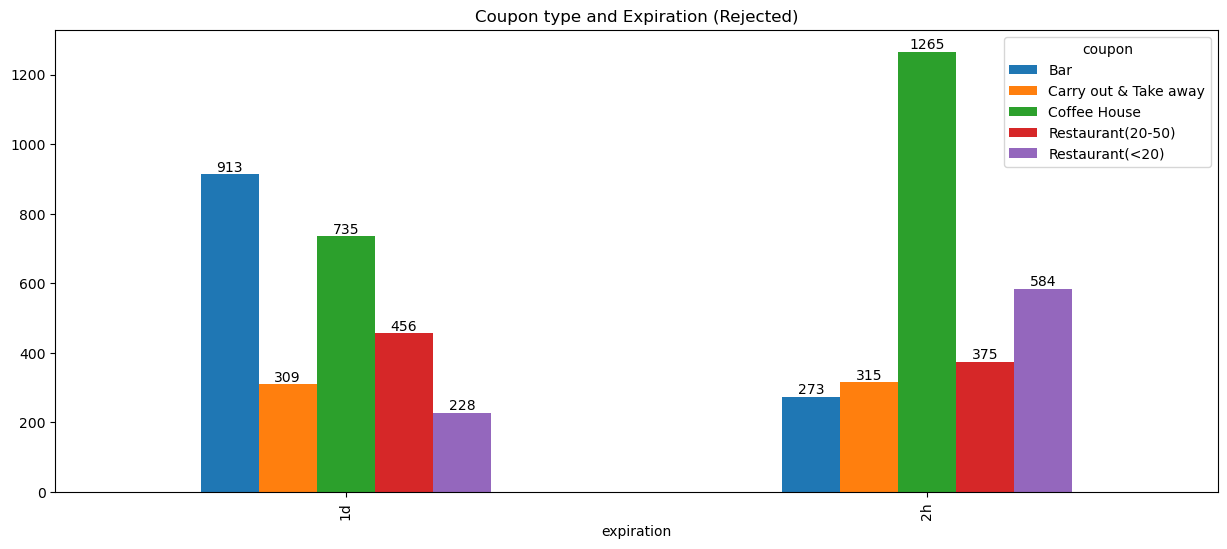

In [43]:
ax = pd.crosstab(df_y_0.expiration,df_y_0.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Coupon type and Expiration (Rejected)')
plt.show()

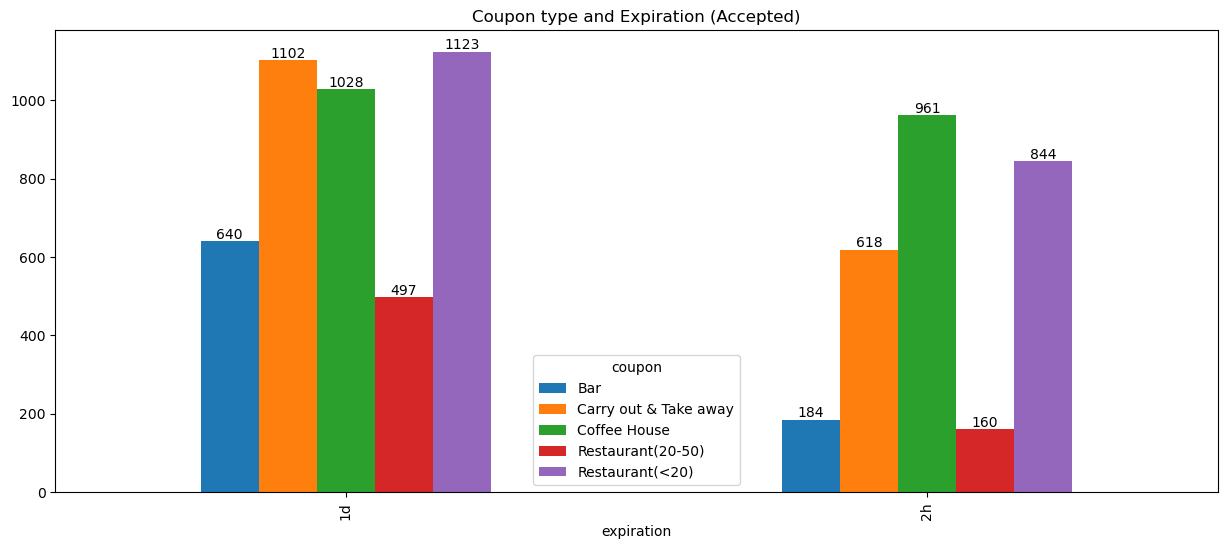

In [44]:
ax = pd.crosstab(df_y_1.expiration,df_y_1.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Coupon type and Expiration (Accepted)')
plt.show()

In [45]:
cate = []
num = []
for col in df.columns: 
    if df[col].dtype == 'O':
        cate.append(col)
    else: 
        num.append(col)

In [46]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12610.0,63.267248,19.153386,30.0,55.0,80.0,80.0,80.0
toCoupon_GEQ15min,12610.0,0.559794,0.496432,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12610.0,0.116019,0.320260,0.0,0.0,0.0,0.0,1.0
direction_same,12610.0,0.215543,0.411215,0.0,0.0,0.0,0.0,1.0
Y,12610.0,0.567565,0.495434,0.0,0.0,1.0,1.0,1.0


In [47]:
df[cate].describe().T

,count,unique,top,freq
destination,12610,3,No Urgent Place,6266
passanger,12610,4,Alone,7248
weather,12610,3,Sunny,10011
time,12610,5,6PM,3220
coupon,12610,5,Coffee House,3989
expiration,12610,2,1d,7031
gender,12610,2,Female,6469
age,12610,5,21-30,5190
maritalStatus,12610,5,Married partner,5068
has_children,12610,2,0,7383


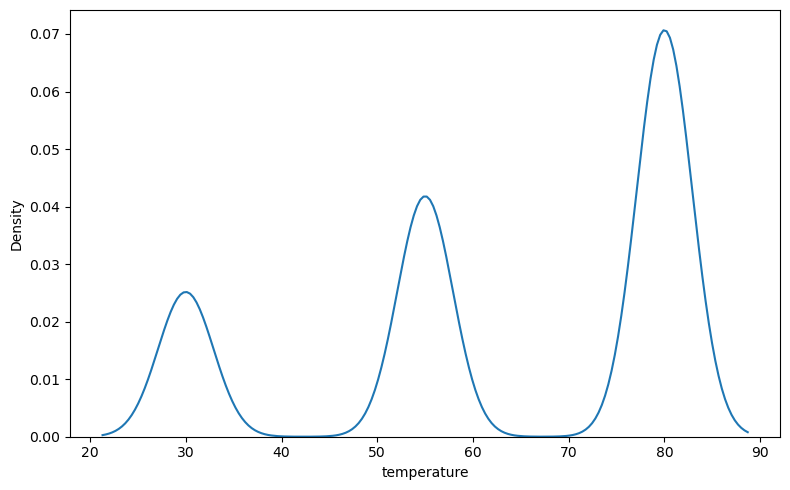

In [48]:
plt.figure(figsize= (8, 5))
sns.kdeplot(x = df['temperature'])
#plt.savefig('ua.png')
plt.tight_layout()

Temperature feature has trimodal distribution. This is because the value of the feature is categorical so that the data distribution is collected on the 3 unique values.

C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_13512\3462938610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=num[i], data=df, palette='rocket', order=df[num[i]].value_counts().index)
C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_13512\3462938610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=num[i], data=df, palette='rocket', order=df[num[i]].value_counts().index)
C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_13512\3462938610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=num

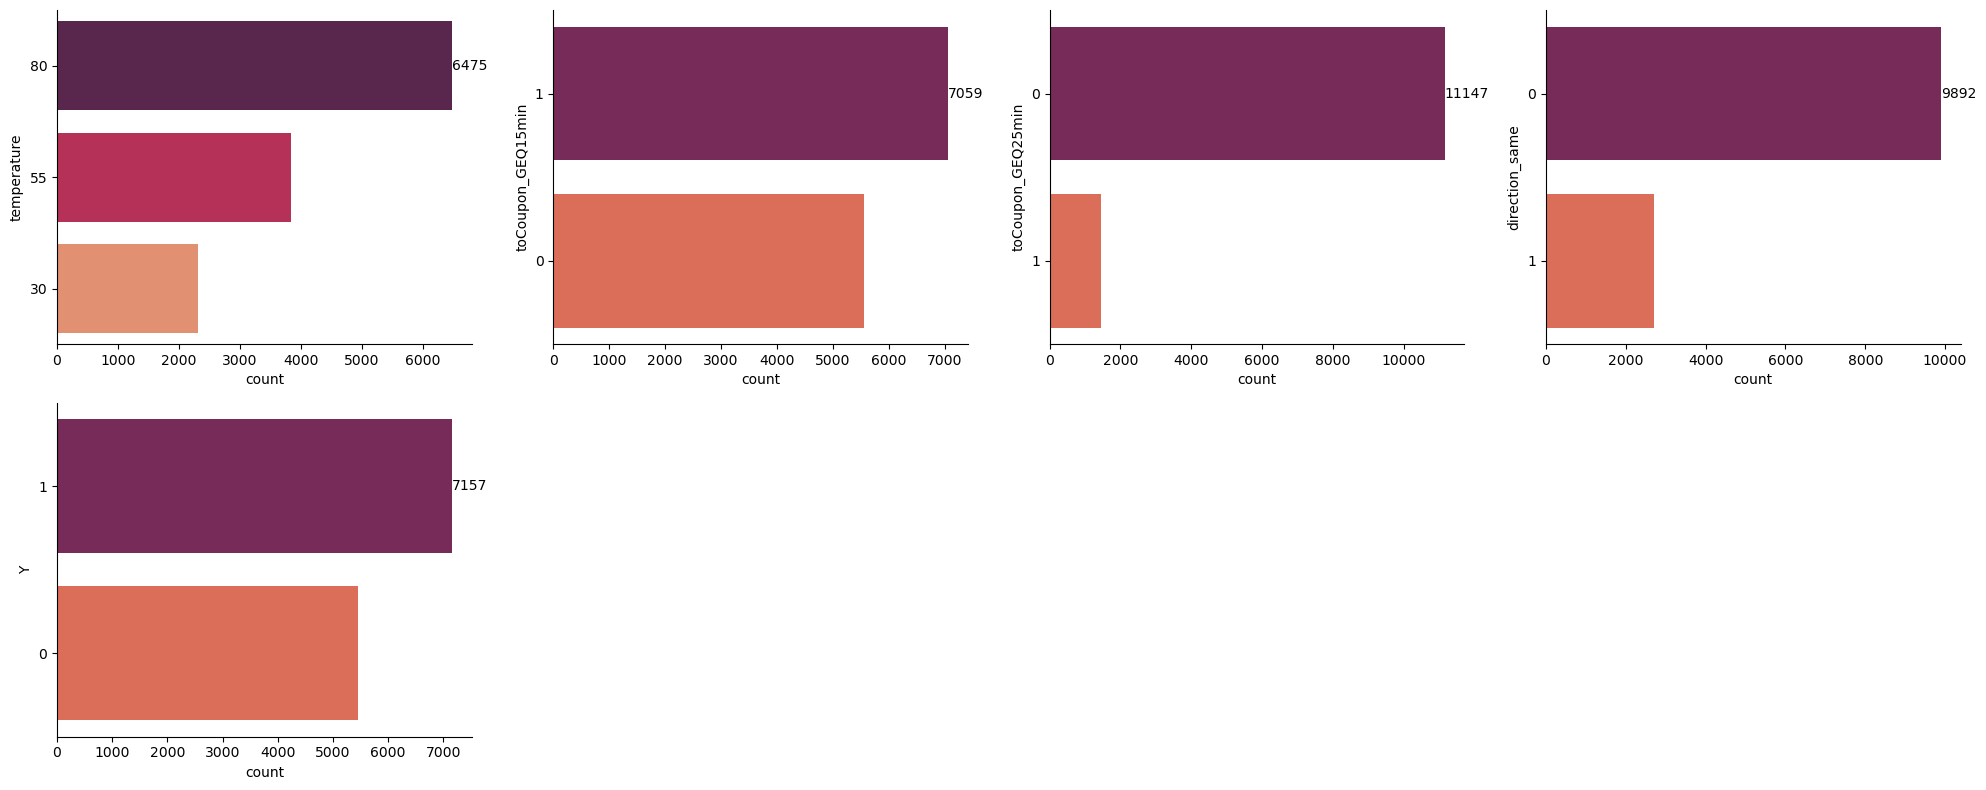

In [49]:
plt.figure(figsize=(20,8))
for i in range(len(num)):
    plt.subplot(2, 4, i+1)
    ax = sns.countplot(y=num[i], data=df, palette='rocket', order=df[num[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar_num.png')

C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_13512\3920995798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=cate[i], data=df, palette='rocket', order=df[cate[i]].value_counts().index)
C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_13512\3920995798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=cate[i], data=df, palette='rocket', order=df[cate[i]].value_counts().index)
C:\Users\Vstore Computer\AppData\Local\Temp\ipykernel_13512\3920995798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y

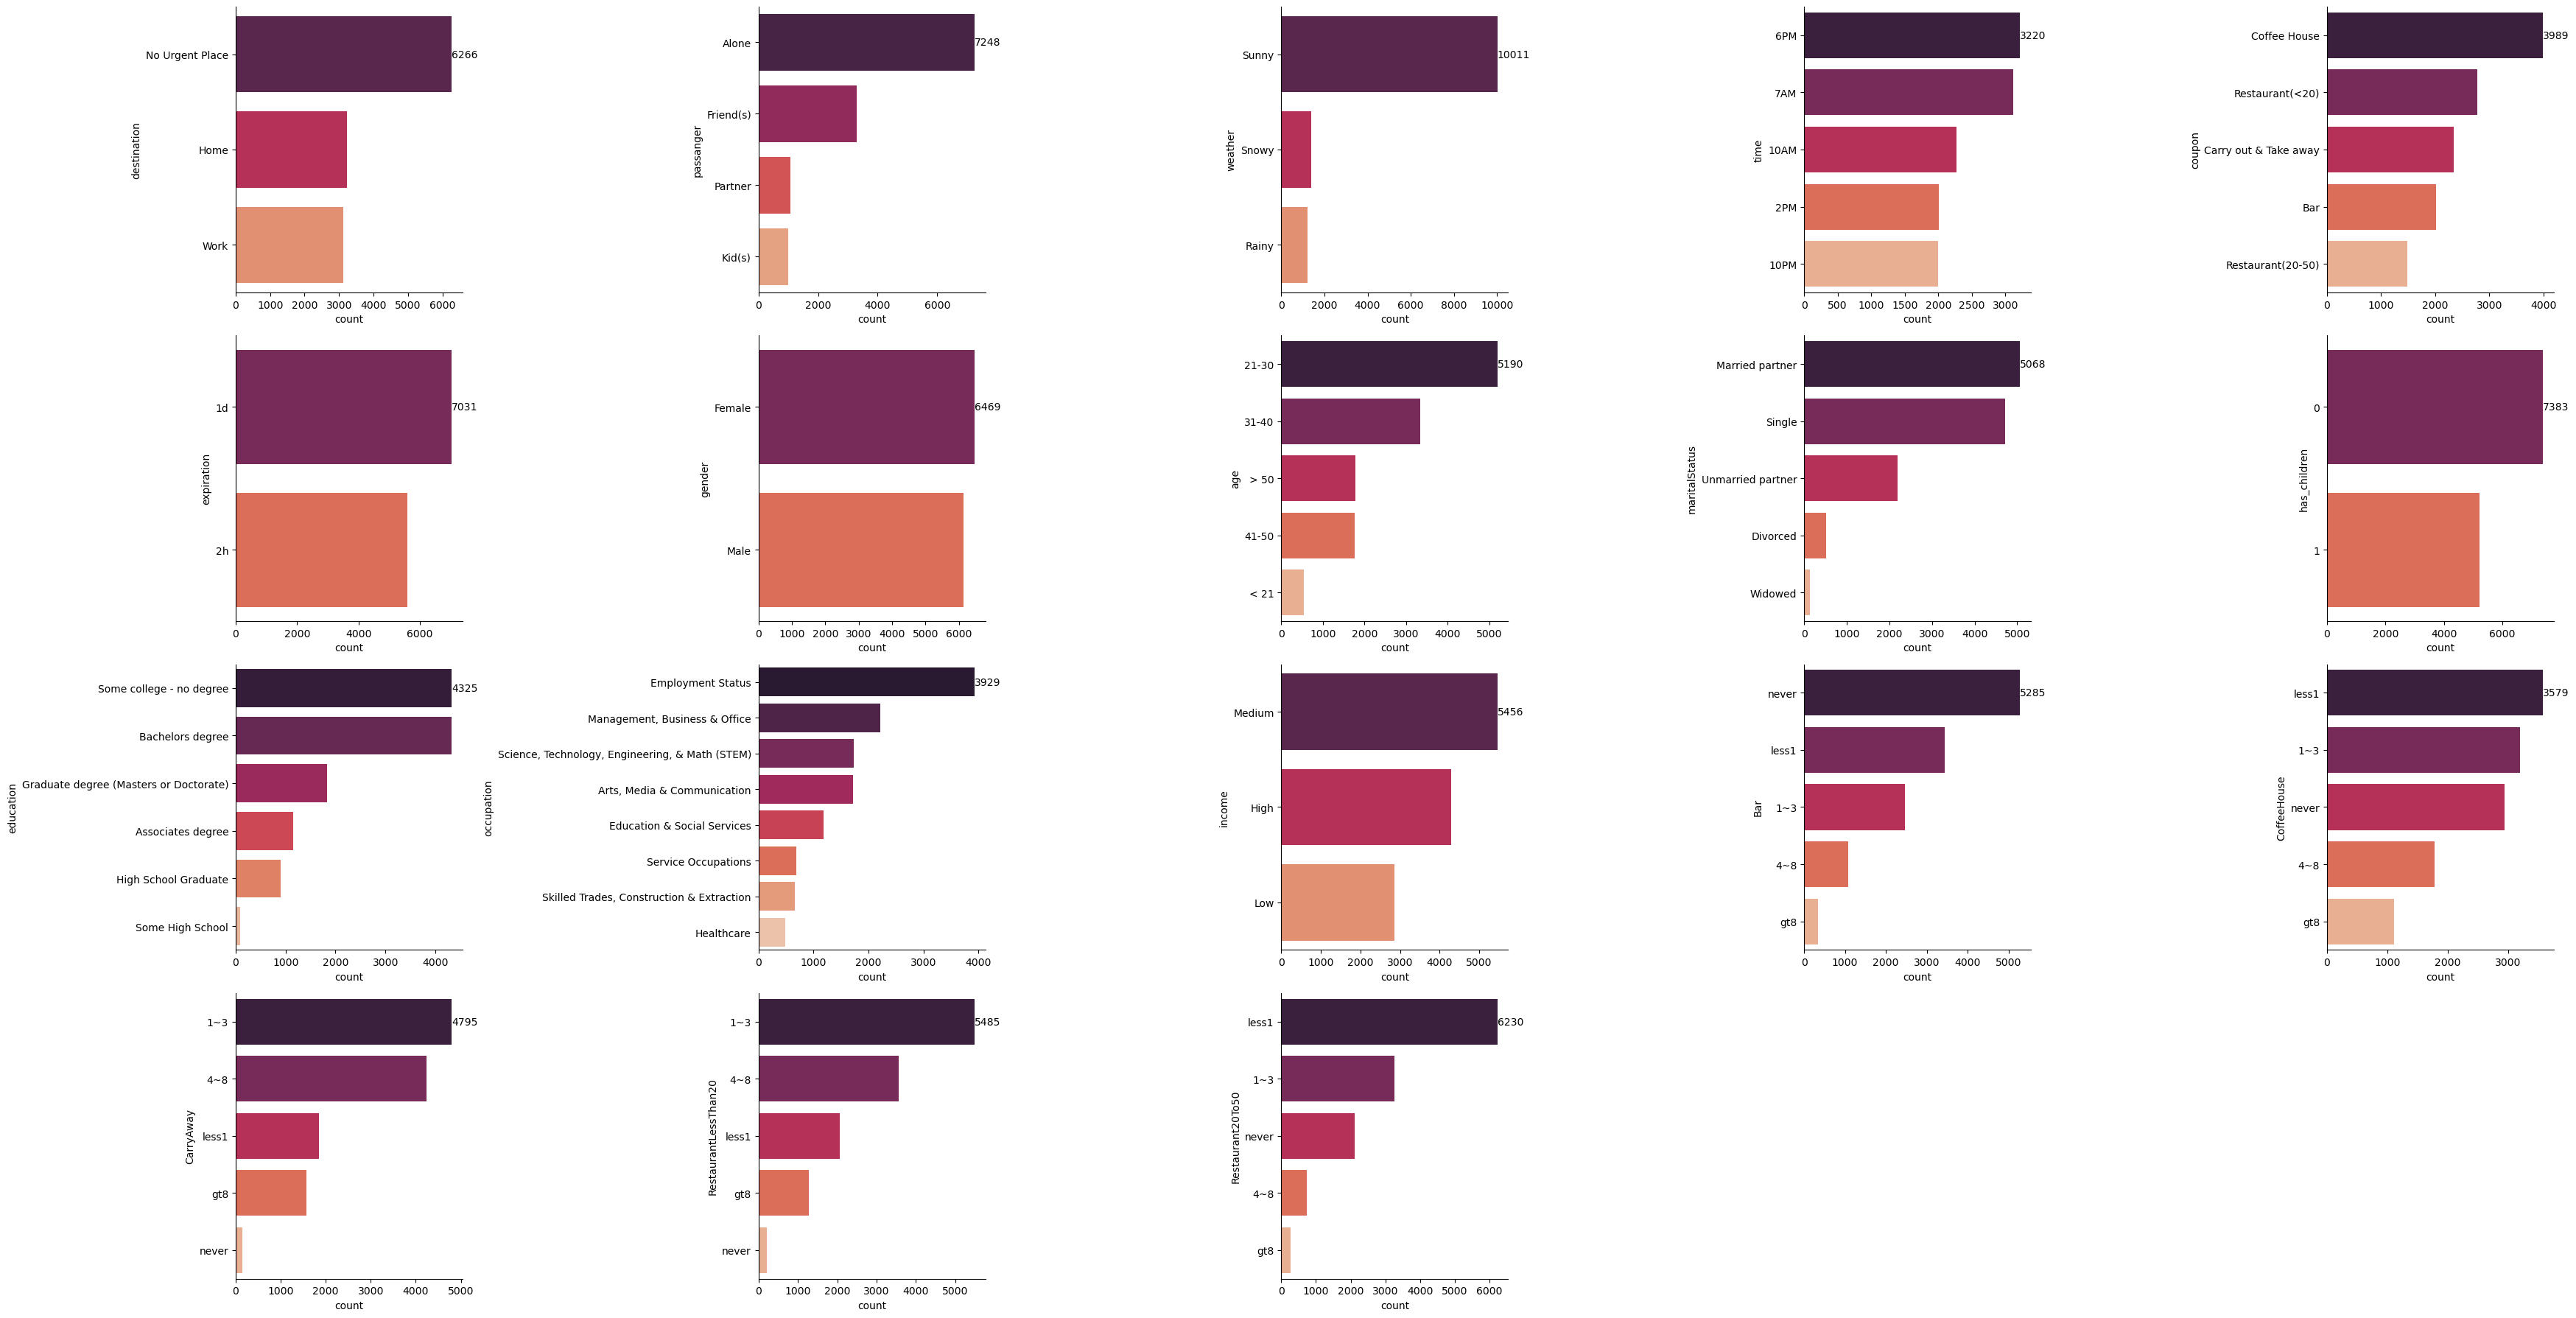

In [50]:
plt.figure(figsize=(35,18))
for i in range(len(cate)):
    plt.subplot(4, 5, i+1)
    ax = sns.countplot(y=cate[i], data=df, palette='rocket', order=df[cate[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()
plt.savefig('ua_bar.png')

#### One-Hot Encoding

In [51]:
df.temperature=df.temperature.astype('object')
df.toCoupon_GEQ15min=df.toCoupon_GEQ15min.astype('object')
df.toCoupon_GEQ25min=df.toCoupon_GEQ25min.astype('object')
df.direction_same=df.direction_same.astype('object')

In [52]:
num

['temperature',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'Y']

In [53]:
cate

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  object
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  object
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [55]:
numcols = df.select_dtypes(include = np.number)
objcols = df.select_dtypes(include = 'object')

In [56]:
objcols

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-30,Unmarried partner,1,Some college - no degree,Employment Status,Medium,never,never,1~3,4~8,1~3,0,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-30,Unmarried partner,1,Some college - no degree,Employment Status,Medium,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-30,Unmarried partner,1,Some college - no degree,Employment Status,Medium,never,never,1~3,4~8,1~3,1,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-30,Unmarried partner,1,Some college - no degree,Employment Status,Medium,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-30,Unmarried partner,1,Some college - no degree,Employment Status,Medium,never,never,1~3,4~8,1~3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,21-30,Single,0,Bachelors degree,"Arts, Media & Communication",High,never,never,1~3,4~8,1~3,0,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,21-30,Single,0,Bachelors degree,"Arts, Media & Communication",High,never,never,1~3,4~8,1~3,0,0,0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21-30,Single,0,Bachelors degree,"Arts, Media & Communication",High,never,never,1~3,4~8,1~3,0,0,1
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,21-30,Single,0,Bachelors degree,"Arts, Media & Communication",High,never,never,1~3,4~8,1~3,1,1,0


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
objcols = objcols.astype(str).apply(LabelEncoder().fit_transform)

In [59]:
objcols.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,1,0,2,1,2,4,0,0,0,3,1,5,2,2,4,4,0,1,0,0,0,0
1,1,1,2,2,0,2,1,0,0,3,1,5,2,2,4,4,0,1,0,0,0,0
2,1,1,2,2,0,1,1,0,0,3,1,5,2,2,4,4,0,1,0,1,0,0
3,1,1,2,2,2,2,1,0,0,3,1,5,2,2,4,4,0,1,0,1,0,0
4,1,1,2,2,2,2,0,0,0,3,1,5,2,2,4,4,0,1,0,1,0,0


In [60]:
numcols.head()

,Y
0,1
1,0
2,1
3,0
4,0


#### Split Train Test

In [61]:
combine_df = pd.concat([numcols,objcols],axis = 1)

In [62]:
combine_df.head()

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,1,1,0,2,1,2,4,0,0,0,3,1,5,2,2,4,4,0,1,0,0,0,0
1,0,1,1,2,2,0,2,1,0,0,3,1,5,2,2,4,4,0,1,0,0,0,0
2,1,1,1,2,2,0,1,1,0,0,3,1,5,2,2,4,4,0,1,0,1,0,0
3,0,1,1,2,2,2,2,1,0,0,3,1,5,2,2,4,4,0,1,0,1,0,0
4,0,1,1,2,2,2,2,0,0,0,3,1,5,2,2,4,4,0,1,0,1,0,0


In [63]:
y = combine_df.Y
X = combine_df.drop('Y',axis = 1)

### Modeling

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
# Random splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10088, 22)
(2522, 22)
(10088,)
(2522,)


In [67]:
# Check the proportion of 0 and 1 in Y label
y_test.value_counts()

Y
1    1416
0    1106
Name: count, dtype: int64

Proportion of deposit label is balance, so we don't have to resampling

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [69]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [70]:
from sklearn.ensemble import RandomForestClassifier

crf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3, 
                             n_estimators=100, oob_score=True)
crf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, oob_score=True, random_state=42)

In [71]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [72]:
params = {
    'max_depth' : [2,3,4,5,10],
    'min_samples_leaf' : [5,10,20,50,100],
    'n_estimators' : [10,25,30,50,100]
}

In [73]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                           cv=4, # cv: cross validation
                           n_jobs=-1, verbose=1, scoring="roc_auc")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='roc_auc', verbose=1)

In [74]:
grid_search.best_score_

np.float64(0.7860146436504745)

In [75]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

### Evaluation

In [76]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

print("Accuracy score for Logistic Regression:",accuracy_score(y_test, y_lr))
print("Accuracy score for Decesion Tree:",accuracy_score(y_test, y_dtree))
print("Accuracy score for Random Forest:",accuracy_score(y_test, y_rf))

Accuracy score for Logistic Regression: 0.6272799365582871
Accuracy score for Decesion Tree: 0.6665344964314036
Accuracy score for Random Forest: 0.7153053132434576


In [78]:
from sklearn.metrics import precision_score

print("Precision score for Logistic Regression:",precision_score(y_test, y_lr, pos_label = 1, average='binary'))
print("Precision score for Decesion Tree:",precision_score(y_test, y_dtree, pos_label = 1, average='binary'))
print("Precision score for Random Forest:",precision_score(y_test, y_rf, pos_label = 1, average='binary'))

Precision score for Logistic Regression: 0.6386946386946387
Precision score for Decesion Tree: 0.7046263345195729
Precision score for Random Forest: 0.7055359246171967


In [79]:
from sklearn.metrics import recall_score

print("Recall score for Logistic Regression:",recall_score(y_test, y_lr, pos_label = 1, average='binary'))
print("Recall score for Decesion Tree:",recall_score(y_test, y_dtree, pos_label = 1, average='binary'))
print("Recall score for Random Forest:",recall_score(y_test, y_rf, pos_label = 1, average='binary'))

Recall score for Logistic Regression: 0.7740112994350282
Recall score for Decesion Tree: 0.6991525423728814
Recall score for Random Forest: 0.846045197740113


In [80]:
from sklearn.metrics import roc_auc_score
y_lr_prob = lr.predict_proba(X_test)[:,1]
y_dtree_prob = dtree.predict_proba(X_test)[:,1]
y_rf_prob = rf_best.predict_proba(X_test)[:,1]

print("ROC AUC score for Logistic Regression:",roc_auc_score(y_test, y_lr_prob))
print("ROC AUC score for Decesion Tree:",roc_auc_score(y_test, y_dtree_prob))
print("ROC AUC score for Random Forest:",roc_auc_score(y_test, y_rf_prob))

ROC AUC score for Logistic Regression: 0.6682380901298516
ROC AUC score for Decesion Tree: 0.6620478565809503
ROC AUC score for Random Forest: 0.7769268295174754


In [81]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_lr))
print("Decesion Tree:")
print(classification_report(y_test, y_dtree))
print("Random Forest:")
print(classification_report(y_test, y_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.60      0.44      0.51      1106
           1       0.64      0.77      0.70      1416

    accuracy                           0.63      2522
   macro avg       0.62      0.61      0.60      2522
weighted avg       0.62      0.63      0.62      2522

Decesion Tree:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1106
           1       0.70      0.70      0.70      1416

    accuracy                           0.67      2522
   macro avg       0.66      0.66      0.66      2522
weighted avg       0.67      0.67      0.67      2522

Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      1106
           1       0.71      0.85      0.77      1416

    accuracy                           0.72      2522
   macro avg       0.72      0.70      0.70      2522
weighted avg       0.72

Observation: we got **72%** of accuracy score in **Random Forest** model